In [140]:
import pandas as pd
import numpy as np

In [141]:
df = pd.read_csv('fake_reg.csv')

In [142]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\saira\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


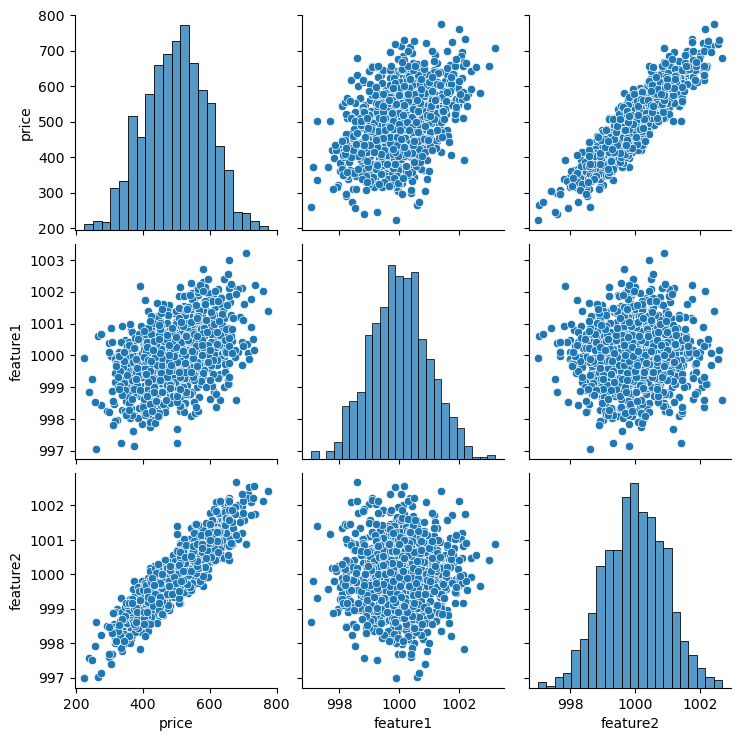

In [144]:
sns.pairplot(df)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [147]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [152]:
scaler = MinMaxScaler()

In [153]:
scaler.fit(X_train)

MinMaxScaler()

In [154]:
scaler.transform(X_train)

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [155]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
X_train.max()

1.0

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   


In [158]:
help(Sequential)
help(Dense)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [159]:
model = Sequential()
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')


In [160]:
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [161]:
model.fit(X_train, y_train, epochs=250, verbose=2)


Epoch 1/250
22/22 - 0s - loss: 256660.0625
Epoch 2/250
22/22 - 0s - loss: 256562.2656
Epoch 3/250
22/22 - 0s - loss: 256448.8281
Epoch 4/250
22/22 - 0s - loss: 256308.0156
Epoch 5/250
22/22 - 0s - loss: 256123.6875
Epoch 6/250
22/22 - 0s - loss: 255866.2344
Epoch 7/250
22/22 - 0s - loss: 255500.9531
Epoch 8/250
22/22 - 0s - loss: 255021.0312
Epoch 9/250
22/22 - 0s - loss: 254402.4688
Epoch 10/250
22/22 - 0s - loss: 253619.7031
Epoch 11/250
22/22 - 0s - loss: 252635.2656
Epoch 12/250
22/22 - 0s - loss: 251409.1719
Epoch 13/250
22/22 - 0s - loss: 249905.6406
Epoch 14/250
22/22 - 0s - loss: 248078.3281
Epoch 15/250
22/22 - 0s - loss: 245882.0781
Epoch 16/250
22/22 - 0s - loss: 243273.4844
Epoch 17/250
22/22 - 0s - loss: 240207.7500
Epoch 18/250
22/22 - 0s - loss: 236650.6562
Epoch 19/250
22/22 - 0s - loss: 232531.0781
Epoch 20/250
22/22 - 0s - loss: 227829.5156
Epoch 21/250
22/22 - 0s - loss: 222516.8438
Epoch 22/250
22/22 - 0s - loss: 216573.2500
Epoch 23/250
22/22 - 0s - loss: 209949.59

<Axes: >

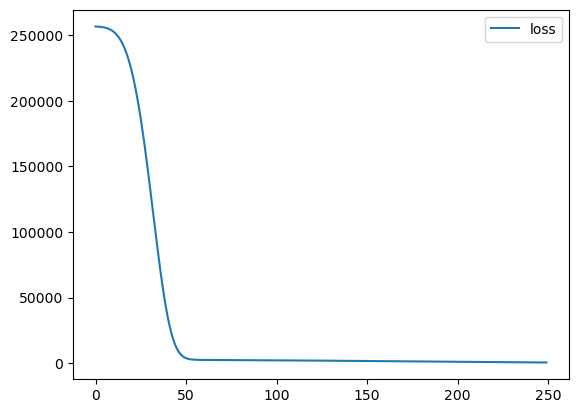

In [162]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [163]:
model.evaluate(X_test, y_test, verbose=0)

441.8717041015625

In [164]:
model.evaluate(X_train, y_train, verbose=0)

454.1948547363281

In [165]:
# Make predictions
predictions = model.predict(X_test)

In [166]:
predictions

array([[427.75772],
       [599.31757],
       [576.3963 ],
       [554.94653],
       [389.6382 ],
       [563.2958 ],
       [506.53458],
       [473.0922 ],
       [537.0204 ],
       [464.59503],
       [590.2684 ],
       [548.3292 ],
       [438.0282 ],
       [428.76883],
       [629.13635],
       [455.09238],
       [515.23706],
       [621.3266 ],
       [627.17847],
       [556.7965 ],
       [367.93277],
       [458.36484],
       [406.94046],
       [407.2441 ],
       [554.013  ],
       [585.09644],
       [526.5218 ],
       [446.22693],
       [619.82776],
       [437.69247],
       [460.08743],
       [490.54538],
       [454.3735 ],
       [641.64923],
       [448.09854],
       [434.23843],
       [511.96768],
       [542.5193 ],
       [503.90927],
       [412.61813],
       [597.12476],
       [438.92273],
       [585.7231 ],
       [465.19217],
       [503.62515],
       [574.83984],
       [641.2543 ],
       [497.6683 ],
       [363.09744],
       [490.01508],


In [ ]:
pred_df = pd.DataFrame(data=predictions, columns=['Predictions'])

In [168]:
test_predictions = pd.Series(predictions.reshape(300,))

In [169]:
test_predictions

0      427.757721
1      599.317566
2      576.396301
3      554.946533
4      389.638214
          ...    
295    521.593384
296    501.655945
297    589.275940
298    440.555908
299    429.192657
Length: 300, dtype: float32

In [170]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [171]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [172]:
pred_df.columns = ['Test Y','Model Predictions']

In [173]:
pred_df


,Test Y,Model Predictions
0,402.296319,427.757721
1,624.156198,599.317566
2,582.455066,576.396301
3,578.588606,554.946533
4,371.224104,389.638214
...,...,...
295,525.704657,521.593384
296,502.909473,501.655945
297,612.727910,589.275940
298,417.569725,440.555908


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

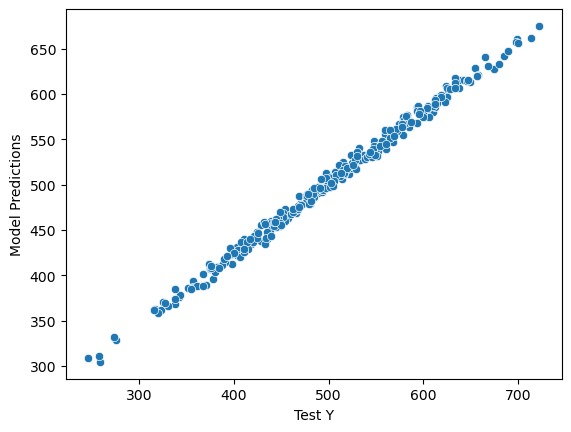

In [174]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [175]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

In [176]:
pred_df['Error'] 

0     -25.461402
1      24.838633
2       6.058765
3      23.642073
4     -18.414111
         ...    
295     4.111273
296     1.253528
297    23.451970
298   -22.986184
299   -18.654408
Name: Error, Length: 300, dtype: float64

C:\Users\saira\AppData\Local\Temp\ipykernel_26652\1356567216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

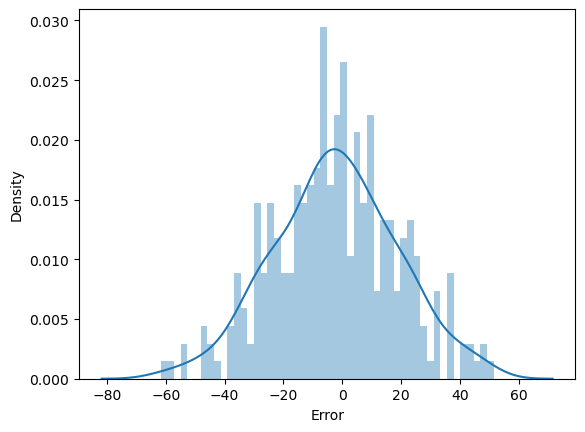

In [177]:
sns.distplot(pred_df['Error'],bins=50)

In [178]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [179]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

16.65638847469021

In [180]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [181]:
new_gem = [[998,1000]]

In [184]:
new_gem = scaler.transform(new_gem)

In [185]:
model.predict(new_gem)

array([[431.90033]], dtype=float32)

In [186]:
from tensorflow.keras.models import load_model

In [187]:
model.save('my_model.h5') 

In [188]:
later_model = load_model('my_model.h5')

In [189]:
later_model.predict(new_gem)

array([[431.90033]], dtype=float32)